In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Localization of high values in final M

In [3]:
B = np.loadtxt('results/results-D10-iter10/finalB.csv', delimiter=',')
print(B)

[[ 1.36834865e-04  7.80947750e-05  8.91623503e-05 ... -5.68835568e-05
  -1.13150182e-04 -7.65678790e-05]
 [ 2.45188796e-04  1.65783543e-04  2.10396296e-04 ... -2.08841296e-04
  -2.33252975e-04 -2.04953822e-04]
 [ 2.04758209e-04  1.25210259e-04  1.67864374e-04 ... -1.53920052e-04
  -1.91569547e-04 -1.59005823e-04]
 ...
 [ 2.11126750e-04  1.28726502e-04  1.67619081e-04 ... -1.46695911e-04
  -1.87943857e-04 -1.54985282e-04]
 [ 3.27584127e-04  2.10073331e-04  2.95618778e-04 ... -3.45361707e-04
  -3.51608280e-04 -3.27871322e-04]
 [ 1.95292904e-04  1.22343519e-04  1.45691359e-04 ... -9.72277786e-05
  -1.48523383e-04 -1.08856374e-04]]


In [39]:
M = B.T @ B

print('Number of relatively large entries of M = ', np.sum(M > 0.03))
xplacement = np.broadcast_to(np.arange(4608), (4608, 4608))
print('\nMatrix of column positions =\n', xplacement)
print('Column with relatively high values = \n', xplacement[M >0.03])

yplacement = xplacement.T
print('\nMatrix of row positions =\n', yplacement)
print('Column with relatively high values = \n', yplacement[M >0.03])

print('\nM is symmetric so high valued columns and rows have the same indices.')

Number of relatively large entries of M =  40

Matrix of column positions =
 [[   0    1    2 ... 4605 4606 4607]
 [   0    1    2 ... 4605 4606 4607]
 [   0    1    2 ... 4605 4606 4607]
 ...
 [   0    1    2 ... 4605 4606 4607]
 [   0    1    2 ... 4605 4606 4607]
 [   0    1    2 ... 4605 4606 4607]]
Column with relatively high values = 
 [ 932  933  934  935 1336 1338  932  933  934  935 1336 1338  932  933
  934  935 1336 1338  932  933  934  935 1336 1338  932  933  934  935
 1336 1337 1338 2620 1336  932  933  934  935 1336 1338 1336]

Matrix of row positions =
 [[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [4605 4605 4605 ... 4605 4605 4605]
 [4606 4606 4606 ... 4606 4606 4606]
 [4607 4607 4607 ... 4607 4607 4607]]
Column with relatively high values = 
 [ 932  932  932  932  932  932  933  933  933  933  933  933  934  934
  934  934  934  934  935  935  935  935  935  935 1336 1336 1336 1336
 1336 1336 1336

Text(0.5, 1.0, 'Final M')

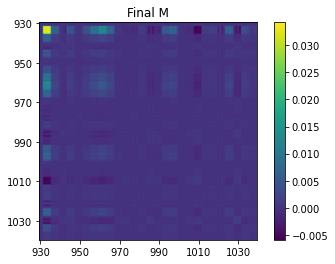

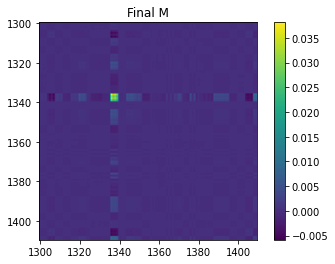

In [42]:
ticks = np.array([0, 20, 40, 60, 80, 100])

plt.figure()
plt.imshow(M[930:1040, 930:1040])
plt.xticks(ticks, ticks + 930)
plt.yticks(ticks, ticks + 930)
plt.colorbar()
plt.title('Final M')

plt.figure()
plt.imshow(M[1300:1410, 1300:1410])
plt.xticks(ticks, ticks + 1300)
plt.yticks(ticks, ticks + 1300)
plt.colorbar()
plt.title('Final M')

In [26]:
print('Each entry in the feature vector corresponds to ', 256*256/4608, ' pixels in 256x256 frames.')

Each entry in the feature vector corresponds to  14.222222222222221  pixels in 256x256 frames.


# Variance between different movie repeats

In [45]:
data_path = '../../data/original_files/'
binned_data = np.loadtxt(data_path + 'spikes.csv', delimiter=',')
binned_data = binned_data.reshape(binned_data.shape[0], 1141, 113)
print(binned_data.shape)

(297, 1141, 113)


In [67]:
I_order = [54, 35, 10, 60, 74, 9, 61, 56, 91, 104]
print('{:-^10}---{:-^10}(%)'.format('Neuron ID', 'Difference'))
print('-'*26)

diffs1 = []
for neu_i in I_order:
    base = binned_data[0, :, neu_i]
    diffs2 = []
    for trial in range(297):
        diffs2.append(np.sum(base != binned_data[trial, :, neu_i]))
    avg = np.mean(diffs2)*100/1141
    print('{: ^10}   {: ^10.3}'.format(neu_i, avg))
    diffs1.append(avg)
    
print('-'*26)
print('{: ^10}   {: ^10.3}'.format('AVG', np.mean(diffs1)))

Neuron ID----Difference(%)
--------------------------
    54          2.44   
    35          4.01   
    10          3.24   
    60          1.46   
    74          2.05   
    9          0.722   
    61          5.31   
    56          2.55   
    91          7.19   
   104          2.75   
--------------------------
   AVG          3.17   
